In [15]:
import numpy as np
import matplotlib.pyplot as plt

from random import randint
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import product
from collections.abc import Iterable
from sklearn.metrics import confusion_matrix
from random import uniform
from random import choice

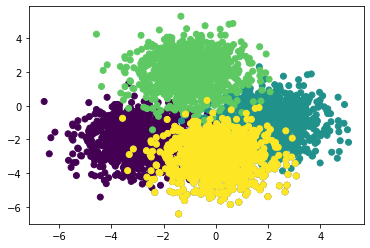

In [16]:
while True:
    noise = np.random.randn(997, 2)

    cloud1 = noise + np.array([randint(-3, 3), randint(-3, 3)])
    cloud2 = noise + np.array([randint(-3, 3),randint(-3, 3)])
    cloud3 = noise + np.array([randint(-3, 3),randint(-3, 3)])
    cloud4 = noise + np.array([randint(-3, 3),randint(-3, 3)])
    cloud5 = noise + np.array([randint(-3, 3), randint(-3, 3)])

    X = np.vstack([cloud1, cloud2, cloud3, cloud4, cloud5])

    annot1 = [0] * cloud1.shape[0]
    annot2 = [1] * cloud2.shape[0]
    annot3 = [2] * cloud3.shape[0]
    annot4 = [3] * cloud4.shape[0]
    annot5 = [4] * cloud5.shape[0]
    y = annot1 +annot2 + annot3 + annot4 + annot5

    data, labels = shuffle(X, y)

    test_size = int(len(data) * 0.5)
    Xtrain = data[:test_size]
    Ytrain = labels[:test_size]
    Xtest = data[test_size:]
    Ytest = labels[test_size:]

    clf = LogisticRegression()
    clf.fit(Xtrain, Ytrain)

    predictions = clf.predict(Xtest)

    if accuracy_score(Ytest, predictions)>=0.704:
        if accuracy_score(Ytest, predictions)<=0.716:
            break
plt.scatter(X[:,0], X[:,1], c=y) 

In [17]:
Kmodel = KNeighborsClassifier(n_neighbors = 58)
Kmodel.fit(Xtrain, Ytrain)
TreeModel = DecisionTreeClassifier()
TreeModel.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [18]:
def flatten(l):
    for el in l:
        if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

# Реализация собственной функции поиска оптимальных гиперпараметров методом ```Grid Search```

Была реализована функция ```GridSearch```, аргументами которой являеются метод тестируемого классификатора из библиотеки scikit learn и варианты гиперпараметров классификации. Оформление входных данных сделано на подобие метода ```Grid Search``` в *sklearn*. Если описывать кратко алгоритм, то создается список всех возможных комбинаций входных гиперпараметров и они поочереди тестируются в в желаемом классификаторе. Стоит учесть, что на разбитые выборки должны называться ```Xtrain```, ```Ytest``` и пр., для того, чтобы функция могла 'уловить' учебную и тестовые выборки.

У функции существует два разных сценария поведения. Простой: для словаря с одним гиперпараметром; и сложный: для двух и более гиперпараметров.

Выбор гиперпараметров был обусловлен разнообразностью входных данных. Значения типа ```int```, ```float```, ```str```. Исключены были гиперпараметры заключающиеся в случайном подборе чего-бы ни было, так как они дают довольно непредсказуемый и трудно воспроизводимый резульат.

In [19]:
max_depth = [2,3,4,5,6,7,8,9,10]
max_leaf_nodes = [2,3,4,5,6,7,8,9,10]
criterion = ['entropy','gini']
min_samples_split = [0.2,0.4,0.6,0.8, 1.0]
min_weight_fraction_leaf = [0, 0.1, 0.2, 0.3, 0.4,0.5]
max_features = ['auto', 'sqrt', 'log2']
parameters_for_tree = {
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'criterion': criterion,
    'min_samples_split': min_samples_split,
    'min_weight_fraction_leaf': min_weight_fraction_leaf,
    'max_features': max_features
}

n_neighbors = [1,2,3,4,5,6,7,8,9,10]
parameters_for_Kclf = {
    'n_neighbors': n_neighbors
}

def GridSearch(model, parameters):
    keys = list(parameters.keys())
    minimal_false = len(X)
    optimal_parameters = {}
    helper = 1
    
    
    if len(parameters) == 1:
        print("Ну здесь я справлюсь быстро")
        new_dict = parameters
        for param in parameters[keys[0]]:
            new_dict[keys[0]] = param 
            
            clfc = model(**new_dict)
            clfc.fit(Xtrain, Ytrain)
            predict = clfc.predict(Xtest)
            matrix = confusion_matrix(Ytest, predict)
            
            false_sum=0
            for row in matrix: 
                for row in range(len(matrix)):
                    for col in range(row + 1, len(matrix)):
                        false_sum+=matrix[row][col]
        
            if false_sum < minimal_false:
                minimal_false = false_sum
                optimal_parameters = new_dict
        print('Оптимальные параметры:', optimal_parameters)
        print('Ошибок первого рода:', minimal_false, 'из', len(X), 'элементов')
    
    
    else:
        print('Здесь много работы')
        pre_combo = []
        
        print('Обработка', len(keys), 'параметров может занять продолжительное время')
        for i in range (len(keys)):
            pre_combo.append(parameters.get(keys[i]))
            
        print('Начинаю собирать все возможные комбинации гиперпараметров')
        tmp = list(product(pre_combo[0], pre_combo[1]))
        for i in range(len(pre_combo)-2):
            
            tmp = list(product(tmp, pre_combo[i+2]))
    
        combo = []
        for i in range (len(tmp)):
            temp = list(flatten(tmp[i]))
            combo.append(temp)
    
        for vari in range(len(combo)):
            new_dict = parameters
            for par in range (len(new_dict)):
                new_dict[keys[par]] = combo[vari][par]
        
            clfc = model(**new_dict)
            clfc.fit(Xtrain, Ytrain)
            predict = clfc.predict(Xtest)
            matrix = confusion_matrix(Ytest, predict)
            helper+=1
            
            if helper % 1000 == 0:
                print('Я посчитал уже', helper, 'вариантов комбинаций, но пока не нашел более лучшей')
    
            false_sum=0
            for row in matrix: 
                for row in range(len(matrix)):
                    for col in range(row + 1, len(matrix)):
                        false_sum+=matrix[row][col]
                        
                        
        
            if false_sum < minimal_false:
                minimal_false = false_sum
                optimal_parameters = new_dict
                print('Я посчитал комбинацию', helper, 'из', len(combo))
                print('И нашел в этой комбинации более подходящие гиперпараметры:')
                print(optimal_parameters) 
                print('Ошибок первого рода:',minimal_false)
                print()
    print('Я закончил работу')

In [37]:
GridSearch(DecisionTreeClassifier, parameters_for_tree)

Здесь много работы
Обработка 7 параметров может занять продолжительное время
Начинаю собирать все возможные комбинации гиперпараметров
Я посчитал комбинацию 2 из 192
И нашел в этой комбинации более подходящие гиперпараметры:
{'max_depth': 1, 'max_leaf_nodes': 2, 'criterion': 'entropy', 'min_samples_split': 0.01, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto'}
Ошибок первого рода: 2525

Я посчитал комбинацию 5 из 192
И нашел в этой комбинации более подходящие гиперпараметры:
{'max_depth': 1, 'max_leaf_nodes': 2, 'criterion': 'entropy', 'min_samples_split': 0.01, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.5, 'max_features': 'auto'}
Ошибок первого рода: 1575

Я посчитал комбинацию 147 из 192
И нашел в этой комбинации более подходящие гиперпараметры:
{'max_depth': 100, 'max_leaf_nodes': 100, 'criterion': 'entropy', 'min_samples_split': 0.01, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'max_features': 'sqrt'}
Ошибок первого рода: 1525

Я

**Здесь я вывожу таблицу с метриками для каждого класса, используя оптимальные гиперпараметры, найденные написанной функцией ```Grid Search``` для классификатора построения дерева решений:**

In [213]:
best_grid_param_tree = DecisionTreeClassifier(max_depth= 3, max_leaf_nodes= 6, criterion= 'entropy', min_samples_split= 0.2, min_weight_fraction_leaf=0,max_features= 'sqrt')
best_grid_param_tree.fit(Xtrain, Ytrain)
predictions = best_grid_param_tree.predict(Xtest)
report = classification_report(Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.46      0.81      0.59       506
           1       0.87      0.77      0.82       515
           2       0.87      0.66      0.75       497
           3       0.48      0.23      0.31       483
           4       0.66      0.73      0.69       492

    accuracy                           0.64      2493
   macro avg       0.67      0.64      0.63      2493
weighted avg       0.67      0.64      0.64      2493



In [38]:
GridSearch(KNeighborsClassifier, parameters_for_Kclf)

Ну здесь я справлюсь быстро
Оптимальные параметры: {'n_neighbors': 1000}
Ошибок первого рода: 610 из 4985 элементов
Я закончил работу


**Здесь я вывожу таблицу с метриками для каждого класса, используя оптимальные гиперпараметры, найденные написанной функцией ```Grid Search``` для классификатора К-ближайших соседей:**

In [211]:
best_grid_param_KNeighbor = KNeighborsClassifier(n_neighbors=10)
best_grid_param_KNeighbor.fit(Xtrain, Ytrain)
predictions = best_grid_param_KNeighbor.predict(Xtest)
report = classification_report(Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.52      0.54      0.53       506
           1       0.87      0.89      0.88       515
           2       0.79      0.79      0.79       497
           3       0.51      0.50      0.51       483
           4       0.70      0.66      0.68       492

    accuracy                           0.68      2493
   macro avg       0.68      0.68      0.68      2493
weighted avg       0.68      0.68      0.68      2493



# Реализация собственной функции оптимальных параметров с помощью метода ```Random Search```.

Далее представлена реализация функции ```Random Search```. Она принимает в себя три параметра: тестируемый классификатор, диапазон или набор гиперпараметров и количество итераций для теста. Из плюсов можно отметить, что данная реализация работает быстрее, чем ```Grid Search``` и при этом имеет некоторый весомый шанс найти более результативные гиперпараметры.

Функция ниже также как и ```Grid Search``` имеет два сценария: простой и сложный. В сложном: создается подобный оригинальному словарю с гиперпараметрами словарь в которой попадают в соответсвующие ключи случайные значения заданного диапазона. Эти случайные комбинации подбираются указанное количество раз.

In [41]:
max_depth = (1, 100)
max_leaf_nodes = (2, 100)
criterion = ['entropy','gini']
min_samples_split = (0.01, 1.0)
min_samples_leaf = (1, 100)
min_weight_fraction_leaf = (0.0, 0.5)
max_features = ['auto', 'sqrt', 'log2']
parameters_for_tree = {
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'criterion': criterion,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'min_weight_fraction_leaf': min_weight_fraction_leaf,
    'max_features': max_features
}

n_neighbors = (1, 1000)
parameters_for_Kclf = {
    'n_neighbors': n_neighbors
}

def RandomSearch(model, parameters, iterations):
    keys = list(parameters.keys())
    minimal_false = len(X)
    optimal_parameters = {}
    
    if len(keys) == 1:
        if isinstance(parameters[keys[0]][0], int):
            method = randint
        if isinstance(parameters[keys[0]][0], float):
            method = uniform
        for iter in range (iterations):
            x = method(parameters[keys[0]][0], parameters[keys[0]][1])
            new_dict = {}
            new_dict[keys[0]] = x
                
            clfc = model(**new_dict)
            clfc.fit(Xtrain, Ytrain)
            predict = clfc.predict(Xtest)
            matrix = confusion_matrix(Ytest, predict)
                
            false_sum=0
            for row in matrix: 
                for row in range(len(matrix)):
                    for col in range(row + 1, len(matrix)):
                        false_sum+=matrix[row][col]
                        
                        
        
            if false_sum < minimal_false:
                minimal_false = false_sum
                optimal_parameters = new_dict
                print('В своей итерации номер', iter+1, 'из', iterations+1)
                print('я сгенерировал данные гиперпараметры:')
                print(optimal_parameters) 
                print('Они оказались лучше всех предыдущих. Ошибок первого рода:',minimal_false)
                print()
                    
                    
    else:
        for iter in range(iterations):
            new_dict = {}
            for i in range(len(keys)):
                if isinstance(parameters[keys[i]][0], int):
                    new_dict[keys[i]] = randint(parameters[keys[i]][0], parameters[keys[i]][1])
                if isinstance(parameters[keys[i]][0], float):
                    new_dict[keys[i]] = uniform(parameters[keys[i]][0], parameters[keys[i]][1])
                if isinstance(parameters[keys[i]][0], str):
                    new_dict[keys[i]] = choice(parameters[keys[i]])
                
            clfc = model(**new_dict)
            clfc.fit(Xtrain, Ytrain)
            predict = clfc.predict(Xtest)
            matrix = confusion_matrix(Ytest, predict)
                
            false_sum=0
            for row in matrix: 
                for row in range(len(matrix)):
                    print(row)
                    for col in range(row + 1, len(matrix)):
                        false_sum+=matrix[row][col]
            
            if false_sum < minimal_false:
                minimal_false = false_sum
                optimal_parameters = new_dict
                print('В своей итерации номер', iter+1, 'из', iterations+1)
                print('я сгенерировал данные гиперпараметры:')
                print(optimal_parameters) 
                print('Они оказались лучше всех предыдущих. Ошибок первого рода:',minimal_false)
                print()

In [191]:
RandomSearch(DecisionTreeClassifier, parameters_for_tree, 10000)

В своей итерации номер 2 из 10001
я сгенерировал данные гиперпараметры:
{'max_depth': 95, 'max_leaf_nodes': 89, 'criterion': 'entropy', 'min_samples_split': 0.05680951314868144, 'min_samples_leaf': 22, 'min_weight_fraction_leaf': 0.3085394928392601, 'max_features': 'auto'}
Они оказались лучше всех предыдущих. Ошибок первого рода: 4005

В своей итерации номер 5 из 10001
я сгенерировал данные гиперпараметры:
{'max_depth': 87, 'max_leaf_nodes': 99, 'criterion': 'entropy', 'min_samples_split': 0.2525102760668485, 'min_samples_leaf': 36, 'min_weight_fraction_leaf': 0.15332872044465284, 'max_features': 'sqrt'}
Они оказались лучше всех предыдущих. Ошибок первого рода: 2465

В своей итерации номер 11 из 10001
я сгенерировал данные гиперпараметры:
{'max_depth': 3, 'max_leaf_nodes': 23, 'criterion': 'gini', 'min_samples_split': 0.4917285241788666, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.055277983500540084, 'max_features': 'sqrt'}
Они оказались лучше всех предыдущих. Ошибок первого р

**Здесь я вывожу таблицу с метриками для каждого класса, используя оптимальные гиперпараметры, найденные написанной функцией ```RandomSearch``` для классификатора построения дерева решений:**

In [22]:
best_random_param_tree = DecisionTreeClassifier(max_depth = 28, max_leaf_nodes= 61, criterion= 'entropy', min_samples_split= 0.23581466322601874, min_samples_leaf= 82, min_weight_fraction_leaf= 0.14266301912432738, max_features= 'auto')
best_random_param_tree.fit(Xtrain, Ytrain)
predictions = best_random_param_tree.predict(Xtest)
report = classification_report(Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.92      0.78       506
           1       0.00      0.00      0.00       504
           2       0.65      0.88      0.74       477
           3       0.41      0.66      0.51       494
           4       0.47      0.33      0.39       512

    accuracy                           0.56      2493
   macro avg       0.44      0.56      0.49      2493
weighted avg       0.44      0.56      0.48      2493



C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
RandomSearch(KNeighborsClassifier, parameters_for_Kclf, 100)

В своей итерации номер 1 из 101
я сгенерировал данные гиперпараметры:
{'n_neighbors': 706}
Они оказались лучше всех предыдущих. Ошибок первого рода: 675

В своей итерации номер 16 из 101
я сгенерировал данные гиперпараметры:
{'n_neighbors': 872}
Они оказались лучше всех предыдущих. Ошибок первого рода: 630

В своей итерации номер 24 из 101
я сгенерировал данные гиперпараметры:
{'n_neighbors': 823}
Они оказались лучше всех предыдущих. Ошибок первого рода: 610

В своей итерации номер 30 из 101
я сгенерировал данные гиперпараметры:
{'n_neighbors': 920}
Они оказались лучше всех предыдущих. Ошибок первого рода: 560



**Здесь я вывожу таблицу с метриками для каждого класса, используя оптимальные гиперпараметры, найденные написанной функцией ```RandomSearch``` для классификатора построения дерева решений:**

In [39]:
best_random_param_Kneighbor = KNeighborsClassifier(n_neighbors= 1000)
best_random_param_Kneighbor.fit(Xtrain, Ytrain)
predictions = best_random_param_Kneighbor.predict(Xtest)
report = classification_report(Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       506
           1       0.45      0.79      0.58       504
           2       0.79      0.90      0.84       477
           3       0.97      0.97      0.97       494
           4       0.47      0.04      0.07       512

    accuracy                           0.72      2493
   macro avg       0.71      0.72      0.67      2493
weighted avg       0.71      0.72      0.66      2493



In [45]:
minimal_false = len(X)
clf = KNeighborsClassifier(n_neighbors= 10)
clf.fit(Xtrain, Ytrain)
predict = clf.predict(Xtest)
predict = clf.predict(Xtest)
matrix = confusion_matrix(Ytest, predict)
                
false_sum=0

print(matrix)
for row in range(len(matrix)):
    print(row)
    for col in range(row + 1, len(matrix)):
        false_sum+=matrix[row][col]
            
            
if false_sum < minimal_false:
    minimal_false = false_sum
    print(minimal_false)

[[469  20   1   5  11]
 [ 37 197  47   1 222]
 [  2  26 422   8  19]
 [ 11   1   8 474   0]
 [ 35 274  50   0 153]]
0
1
2
3
4
334


# Выводы:
Некоторые выводы были сделаны уже по ходу работы. Нет сомнений, что для фиксированного набора параметров всегда самый точный результат даст ```GridSearch```. Однако его расчеты могут занять продолжительное время. С другой стороны, мы имеем ```RandomSearch```, который, я думаю, никогда не сможет дать самых точных гиперпараметров (готов это утверждать с учетом наличия гиперпараметра с плавающей точкой), однако обладает большей скоростью нахождения оптимального варианта среди куда более обширного диапазона гиперпараметров. Как в плане реализации, так и в плане работы мне лично больше понравился ```RandomSearch```.

Также стоит заметить, что для таких классификаторов, как метод К-ближайших соседей или классификатора с не большим количеством комбинаций параметров, использование ```RandomSearch``` особо не имеет смысла и лучше перебрать все варианты.